In [2]:
# Step 1: Dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Train set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Why normalize? → It speeds up training and improves convergence.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [3]:
# Step 2: Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Flatten 28x28 → 784
    layers.Dense(128, activation='relu'),     # Hidden layer 1
    layers.Dense(64, activation='relu'),      # Hidden layer 2
    layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])
model.summary()   # Architecture + number of parameters


C:\Users\YASHASWINI S\New folder\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 3: Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # since labels are integers 0–9
    metrics=['accuracy']
)
# Why sparse_categorical_crossentropy? → Because labels are not one-hot encoded.


In [5]:
# Step 4: Train
print("\nTraining for 4 epochs...")
history_4 = model.fit(x_train, y_train, epochs=4, validation_split=0.1)

print("\nTraining for 10 epochs...")
history_10 = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# Does accuracy always improve? → Not necessarily; it may plateau or overfit.


Training for 4 epochs...
Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9246 - loss: 0.2593 - val_accuracy: 0.9647 - val_loss: 0.1200
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1105 - val_accuracy: 0.9733 - val_loss: 0.0941
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0767 - val_accuracy: 0.9710 - val_loss: 0.0918
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9818 - loss: 0.0580 - val_accuracy: 0.9742 - val_loss: 0.0922

Training for 10 epochs...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9856 - loss: 0.0454 - val_accuracy: 0.9763 - val_loss: 0.0853
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9780 - val_loss: 0.0799
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9762 - val_loss: 0.0918
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━

In [6]:
# Step 5: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)
# Compare training vs test accuracy → Training is usually higher, test shows generalization.

313/313 - 1s - 3ms/step - accuracy: 0.9780 - loss: 0.1115

Test accuracy: 0.9779999852180481


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted label (1st image): 7
Actual label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted label (5th image): 4
Actual label: 4


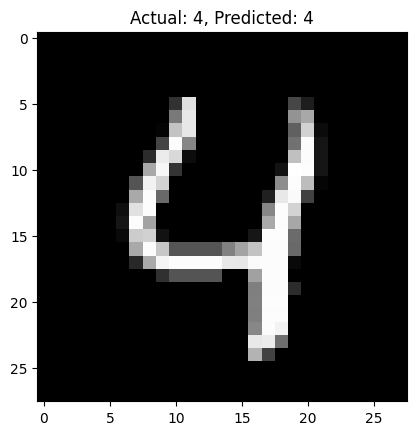

In [7]:
# Step 6: Predict
import numpy as np
import matplotlib.pyplot as plt

# Predict 1st test image
pred1 = model.predict(x_test[0].reshape(1,28,28))
print("Predicted label (1st image):", np.argmax(pred1))
print("Actual label:", y_test[0])

# Predict 5th test image
pred5 = model.predict(x_test[4].reshape(1,28,28))
print("Predicted label (5th image):", np.argmax(pred5))
print("Actual label:", y_test[4])

# Optional: visualize
plt.imshow(x_test[4], cmap="gray")
plt.title(f"Actual: {y_test[4]}, Predicted: {np.argmax(pred5)}")
plt.show()

In [8]:
# Step 7: Experiments
# 1. Add another Dense(32, ReLU)
model_exp1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),   # Extra layer
    layers.Dense(10, activation='softmax')
])
model_exp1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_exp1.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 2. Change optimizer to SGD
model_sgd = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sgd.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 3. Replace ReLU with tanh
model_tanh = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tanh.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9202 - loss: 0.2706 - val_accuracy: 0.9632 - val_loss: 0.1342
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9664 - loss: 0.1103 - val_accuracy: 0.9715 - val_loss: 0.0982
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0782 - val_accuracy: 0.9733 - val_loss: 0.0938
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0598 - val_accuracy: 0.9562 - val_loss: 0.1538
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9735 - val_loss: 0.0909
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8231 - loss: 0.6706 - val_accuracy: 0.9215 - val_loss: 0.2781
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9098 - loss: 0.3100 - val_accuracy: 0.9367 - val_loss: 0.2251
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9249 - loss: 0.2581 - val_accu